# Exercício 2
## Arthur Magalhães - 12629595


## Atividade 1

Numa amostra de Numa amostra de 100 quasares, 10 são radio-loud (fortes emissores em rádio) e 90 são radio-quiet. Dois objetos diferentes são escolhidos aleatoriamente nesta amostra. Qual é a probabilidade de escolhermos:

- a. dois objetos raio-loud;
- b. dois objetos radio-quiet;
- c. um objeto raio-loud e um objeto radio-quiet.

Calcule os valores esperados e os verifique com uma simulação.

Para fazer este exercício usaremos a propriedade da multiplicação de probabilidades dados que os eventos são independentes, de forma que $P(x,y) = P(x) \cdot P(y).$ Temos então:

## a.

Vamos calcular a probabilidade de escolhermos 2 objetos RL nesta amostra.

- Probabilidade da primeira escolha ($P_1$): $\frac{10}{100} = 0,1 = 10\%$
- Probabilidade da segunda escolha ($P_2$): $\frac{9}{99} = 0,091 =9,1\% $

Portanto a probabilidade de se escolher os dois aleatoriamente na amostra é:

- $P_1 \cdot P_2  = \frac{10}{100} \cdot \frac{9}{99}= 0,0091 = 0,91\%$

## b.

Vamos calcular a probabilidade de escolhermos 2 objetos RQ nesta amostra.

- Probabilidade da primeira escolha ($P_1$): $\frac{90}{100} = 0,90 = 90\%$
- Probabilidade da segunda escolha ($P_2$): $\frac{89}{99} = 0,8989 =89,89\% $

Portanto a probabilidade de se escolher os dois aleatoriamente na amostra é:

- $P_1 \cdot P_2  = \frac{90}{100} \cdot \frac{89}{99}= 0,8091 = 80,91\%$

## c.

Vamos calcular a probabilidade de escolhermos 1 objeto RL e 1 RQ nesta amostra.

- Probabilidade da escolha RL ($P_L$): $\frac{10}{100} = 0,1 = 10\%$
- Probabilidade da escolha RQ ($P_Q$): $\frac{90}{99} = 0,9091 = 90,91\% $

Portanto a probabilidade de se escolher os dois aleatoriamente na amostra é:

- $P_L \cdot P_Q  = \frac{10}{100} \cdot \frac{90}{99}= 0,09091 = 9,091\%$

### **Simulação**

Agora vamos testar nossas contas em uma simulação em que são feitas escolhas $10^6$  e depois é calculado a frequência em que cada caso acontece. Temos então:

In [19]:
#Primeiramente vamos gerar a semente de numeros aleatorios com meu NUSP

set.seed(12629595)

# Vamos chamar os objetos "radio-loud" de "1" e os objetos "radio-quiet" de "2"
quasares <- rep(c(1,2) , times=c(10,90))

n = 1000000
na = 0
nb = 0
nc = 0

for (i in 1:n){
# amostragem com substituição: retorna-se a bola à caixa
a = sample(quasares, size = 2, replace = FALSE) 
if(a[1] == 1 & a[2] == 1) {na = na + 1}
if(a[1] == 2 & a[2] == 2) {nb = nb + 1}
if(a[1] == 1 & a[2] == 2) {nc = nc + 1}
}

amostra <- c(na/n,nb/n,nc/n) # Salvando os resultados em um vetor
print(amostra)

[1] 0.009048 0.809695 0.090970


**Discussão**

Os resultados para a simulação feita para cada um dos casos foi:

- a) 0.009048
- b) 0.809695
- c) 0.090970

Que é condizente com o esperado e calculado anteriormente!

## Atividade 2

Numa amostra de 100 galáxias, 68 estão formando estrelas e 44 têm um núcleo ativo. Qual a probabilidade de uma galáxia ao acaso estar formando estrelas e possuir um núcleo ativo? Calcule os valores esperados e os verifique com uma simulação.

### Teoria 

Temos que calcular a probabilidade de uma galáxia apresentar formação estelar (FE) e núcleo ativo (NA).

Sabemos que: $P(FE) = 0.68$ e $P(NA) = 0.44$. Como estas probabilidades são independentes entre si, podemos escrever a probabilidade final como: $P(FE, NA) = P(FE) \cdot P(NA) = 0.44 \cdot 0.68 = 0.2992$


### Simulação
Primeiramente temos o espaço amostral (100 galaxias) e os subgrupos que se interceptam tal qual um Diagrama de Venn, de galáxias com formação estelar (68 galáxias) e com núcleo ativo (44 galáxias). 

Para poder descobrir qual a probabilidade de uma galáxia escolhida ao acaso ter ambas as propriedades, foi primeriamente gerado um vetor com os numero de 1 à 100 espaçados por 1. A partir daí foi realizado um loop em que são gerados 2 vetores com 100 valores nulos, para cada um destes vetores foram sorteado aleatoriamente 68 e 44 valores respectivamente do vetor 1:100. Os número escolhidos foram utilizados para marcar o index de uma posição no vetor nulo para ser transformada de 0 para 1. 

Desta forma, temos agora 2 vetores com tamanho 100, cada um deles formados por zeros e uns, sendo que um deles apresenta 44 números 1 (FE) e o outro 68 (NA). No final disso, pedi para, em cada loop, estes vetores serem multiplicados, de forma que o vetor resultante tenha a propriedade de que seus números 1 representem obrigatoriamente as galáxias que apresentem tanto FE quanto NA.

Em cada loop de $10^5$ a probabilidade foi somada, e no final dividida pelo númeo de vezes que foi rodada. **Resultando então na probabilidade de**: $P(FE,NA) = 0.2991378 $ 

Condizente com o esperado

In [18]:
#primeiramente vamos definir o espaço amostral e o numero de cada tipo de galaxia
galaxias = 100
fe = 68
na = 44
s=0

n = 100000 #numero de vezes que vamos rodar a simulacao

vec1 = seq(1,galaxias,1) #definindo um vetor com numeros entre 1 e 100 de 1 em 1

#print(vec1)


#agora vamos iniciar o loop

for(i in 1:n){
    vec0 = rep(0,galaxias) #criando um vetor de valores nulos
    samp_1 = sample(vec1, fe, replace = FALSE)
    for(u in 1:fe){vec0[samp_1[u]]=1} #estamos pegando valores aleatorios entre 1-100 e utilizando
                                     #eles como index para substituir 0 por 1 no vetor nulo
    
    vec0_1 = rep(0,galaxias)
    samp_2 = sample(vec1, na, replace = FALSE) #fizemo a mesma coisa do processo anterior mas para NA agora
    for(u in 1:na){vec0_1[samp_2[u]]=1}  
    s = s + sum(vec0*vec0_1)/galaxias # agora nos multiplicamos os dois vetores de forma que sobre um vetor
                                    # em que o numero 1 represente as galaxias que contem tanto FE e NA
}

print(s/n)

[1] 0.2991378


## Atividade 3

Se a distribuição de magnitudes de um conjunto de objetos é uma gaussiana de média 15 e desvio padrão 1, qual será a forma de sua distribuição de fluxos? Plote a distribuição de fluxo. Suponha que a relação entre magnitude e fluxo seja $m=m_0−2.5log(f)$, com $m_0 = 0$ (e log na base 10).

Temos que tranformar a magnitude em fluxo, para isso vamos isolar o fluxo na equaçao acima, da forma:

$m = 0 - 2.5log(f) \Rightarrow -0.4m= log(f) \Rightarrow f = 10^{-0.4m}$

Portanto vamos gerar uma distribuição Gaussiana de $10^5$ valores e depois aplicar a conta aterior nos valores para encontrar o fluxo. Depois vamos plotar ambas as distribuições para análise.

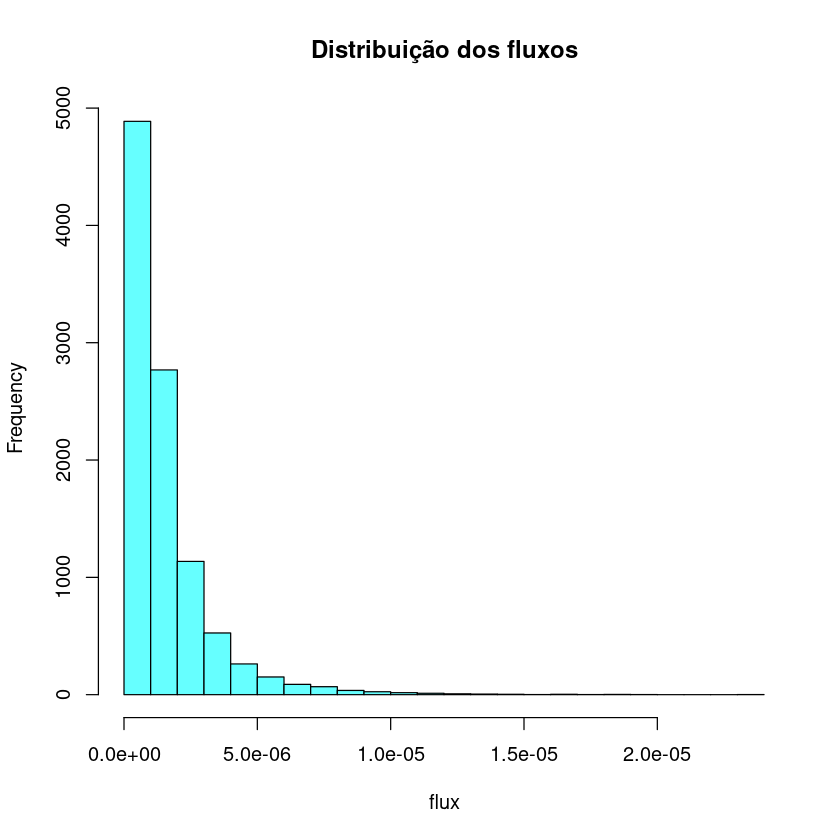

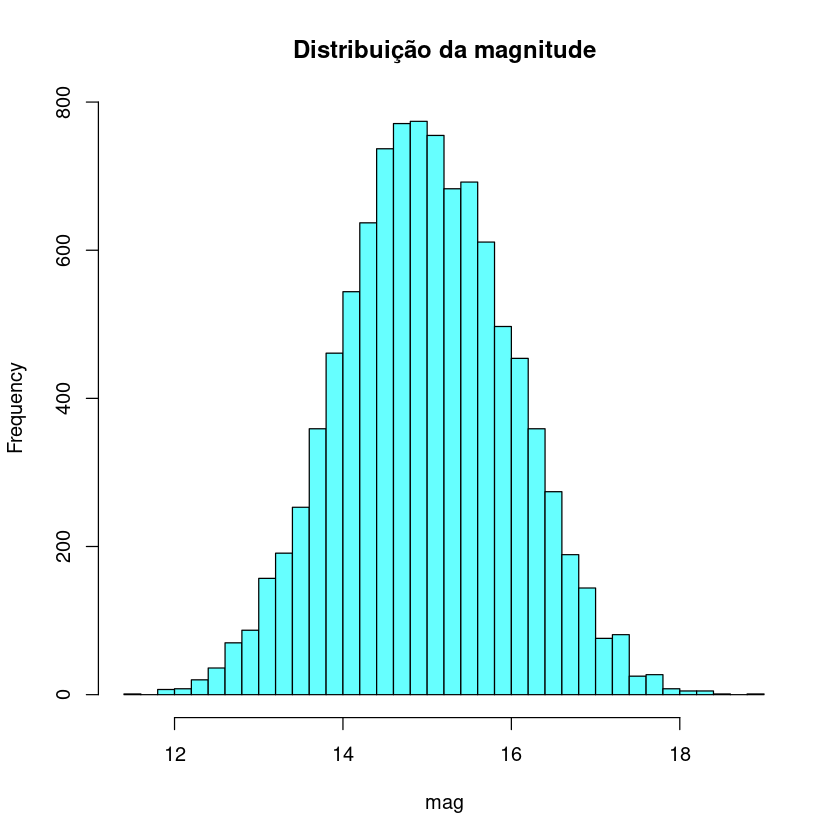

In [44]:
n2 = 10000
mag = rnorm(n2, mean = 15, sd=1)
flux = 10**(-0.4*mag)

hist(flux,col='#66FFFF',breaks=30, main= 'Distribuição dos fluxos')
hist(mag,col='#66FFFF',breaks=30, main= 'Distribuição da magnitude')

## Atividade 4

Considere um dado com 12 faces (dodecaedro). Joga-se o dado uma vez. Qual é a probabilidade de se obter um número par maior que 9? Responda examinando o espaço amostral.

Nosso espaço amostral contém os números {1,2...12}, portanto os números pares maiores 9 são {10,12}. Para calcularmos a chance de tirarmos algum destes números em uma jogada temos que montar a seguinte relação:

$P = \frac{\textbf{casos possíveis}}{\textbf{espaço amostral}}$

Como temos 2 casos possíveis (10,12), então a relação fica da forma:

$P = \frac{2}{12} = 0,1666= 16,66\%$

Também foi realizada (além do pedido) uma simulação para provar o resultado:

### **Simulação**

In [70]:
n3 = 10000

rdu<-function(n,k){sample(1:k,n3,replace=T)}
dados <-rdu(n3,12)

#head(dados)

parmaior9 <- function(x){x == 10 | x==12}

pm = parmaior9(dados)

npm = length(pm[pm == "TRUE"])

print(npm/n)

[1] 0.1666


## Atividade 5

O juri está reunido para julgar um caso de assassinato. A prova principal envolve um teste de DNA, que deu positivo. Seja P(DNA) a probabilidade de se obter ao acaso um DNA similar ao do réu. Em que condições este teste pode prover evidência suficiente para condenar o réu? Veja o exemplo da tabela de contingência do teste médico.

Primeiramente vamos montar o **espaço amostral** do problema:


Resultado do teste (T):
- Positivo (0)
- Negativo (1)

DNA (D):
- DNA similar (0)
- DNA diferente (1)

Espaço amostral:

$(T,D) = \{(0,0),(0,1),(1,0),(1,1)\}$

Vamos supor que conhecemos as respectivas probabilidades:

- P(T=0|D=0): Positivo similar
- P(T=1|D=0): Falso negativo ($p_{FN}$)
- P(T=0|D=1): Falso positivo ($p_{FP}$)
- P(T=1|D=1): Negativo diferente 

Vamos agora fazer a normalização:

- P(T=0|D=0) + P(T=1|D=0) = 1
- P(T=0|D=1) + P(T=1|D=1) = 1

Como o teste deu POSITIVO, vamos tentar descobrir a probabilidade de P(T=0|D=0).

Vamos supor que a probabilidade de o DNA ser similar é P(D=0) = $p_D$ e consequentemente a probabilidade de o DNA ser diferente é de P(D=1) = 1- p_D

Utilzando o teorema de Bayes temos que:


$P(T=0|D=0) = \frac{P(T=0|D=0) P(D=0)}{P(T=0)}$

$ \\ P(T=0|D=0) P(D=0) = (1- p_{FN})p_D$

$ \\ P(T=0) = P(T=0|D=1)P(D=1) + P(T=0|D=0)P(D=0) = p_{FP}(1-p_D) + (1-P_{FN})p_D$

$ \\ P(D=0|T=0) = \frac{p_D- p_{FN}p_D}{p_D +p_{FP}-p_D(p_{FP}+p_{FN})}$ 


Agora, supondo que $p_{FP}$ e $p_{FN}$ sejam pequenos, podemos aproximar a equação para:

$P(D=1|T=1) = \frac{p_D}{p_D + p_{FP}}$

Portanto com isso chegamos a conclusão de que a probabildade de o teste dar negativo com um DNA similar ($p_{FN}$) tem que ser muito pequena para que o teste seja evidência suficiente para condenação do réu.